In [80]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

<h1>Import Library</h1>
<p>Kode di atas digunakan untuk mengimport library numpy yang dideklarasikan menjadi np, matplotlib menjadi plt, dan cv2. umpy umumnya digunakan untuk melakukan operasi aritmatika. opencv biasanya digunakan untuk proses input, simpan dan menampilkan citra. Matplotlib umumnya digunakan sebagai library untuk menampilkan gambar, grafik, dan hasil dari suatu pemrosesan data</p>

In [81]:
aduduBase = plt.imread('Assets/adudu.jpg')
boboiboyBase = plt.imread('Assets/boboiboy.jpg')

aduduGray = cv2.cvtColor(aduduBase, cv2.COLOR_RGB2GRAY)
boboiboyGray = cv2.cvtColor(boboiboyBase, cv2.COLOR_RGB2GRAY)

<h1>Membaca Citra</h1>
<p>Kode di atas digunakan untuk membaca citra yang dibutuhkan dari directory Assets menggunakan plt.imread kemudian menyimpannya dalam sebuah variabel. Setelah itu, citra dikonversi menjadi grayscale menggunakan fungsi cvtColor.</p>

In [82]:
meankernel3x3 = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])/9

<h1>Kernel Mean 3x3</h1>
<p>kode di atas merupakan kode yang digunakan untuk mendeklarasikan kernel Mean dengan ukuran 3x3.</p>

In [83]:
meankernel9x9 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1]])/81

<h1>Kernel Mean 9x9</h1>
<p>kode di atas merupakan deklarasi kernel Mean dengan ukuran 9x9 yang nantinya digunakan untuk melakukan pengolahan terhadap citra.</p>

In [84]:
kernelSmooth = np.array([[1/10, 1/10, 1/10],
                     [1/10, 1/5, 1/10],
                     [1/10, 1/10, 1/10]])

kernelSharp = np.array([[1/9, 1/9, 1/9],
                      [1/9, 8/9, 1/9],
                      [1/9, 1/9, 1/9]])

<h1>Smoothing dan Sharpening</h1>
<p>kode di atas merupakan deklarasi kernel yang nantinya digunakan dalam proses perbaikan citra, khususnya ketika proses smoothing dan sharpening. Smoothing ialah proses yang digunakan untuk memperhalus detail citra, sedangkan sharpening ialah proses yang dilakukan untuk mempertajam detail citra.</p>

In [85]:
def mode(array):
    sorted_arr = np.sort(array)
    freq = 1
    max_freq = 0
    sorted_modus = []
    modus = []
    curr_num = None
    
    for i in range(len(array)):
        if i == 0:
            curr_num = sorted_arr[i]
        else:
            if sorted_arr[i] == curr_num:
                freq += 1
            else:
                freq = 1
                curr_num = sorted_arr[i]
        
        if freq > max_freq:
            max_freq = freq
            sorted_modus = [sorted_arr[i]]
        elif freq == max_freq:
            sorted_modus.append(sorted_arr[i])
        
    for i in range(len(array)):
        if array[i] in sorted_modus and array[i] not in modus:
            modus.append(array[i])
    
    return modus

def FilterModus(image, y, x):
    padding_size = y // 2
    padded_arr = np.pad(image, padding_size, mode='edge')
    
    copy_arr = np.zeros_like(image).astype(np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            slice_arr = (padded_arr[i:i + y, j:j + x] / (y * x))
            modus = mode(slice_arr.flatten())
            copy_arr[i, j] = modus[0]
            
    return copy_arr


<h1>Filter Modus</h1>
<p>Kode di atas mendefinisikan dua fungsi: fungsi mode(array) digunakan untuk mencari nilai-nilai modus (nilai yang paling sering muncul) dalam sebuah array, dengan mengurutkan elemen dan menghitung frekuensi kemunculannya; jika terdapat beberapa nilai dengan frekuensi tertinggi yang sama, semua dikembalikan tanpa duplikasi. Fungsi FilterModus(image, y, x) kemudian menerapkan filter modus pada citra dengan menambahkan padding di sekeliling citra dan memproses setiap piksel menggunakan jendela berukuran y×x, menghitung modus dari elemen-elemen di dalam jendela tersebut (meskipun dalam kode ini dibagi dengan (y * x) yang tampaknya tidak perlu), dan mengganti nilai piksel pusat dengan salah satu nilai modus yang ditemukan.</p>

In [86]:
def Mean(image, baris, kolom):
    hasil = np.zeros(image.shape)
    rows = int((baris-1)/2)
    cols = int((kolom-1)/2)
    _image = np.pad(image, ((rows,rows), (cols, cols)), mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            ratarata = np.sum((_image[i:i+baris,j:j+kolom]/(baris*kolom)))
            hasil[i,j] =ratarata
    return hasil

<h1>Filter Mean</h1>
<p>Kode di atas mendefinisikan fungsi Mean(image, baris, kolom) yang berfungsi untuk menerapkan mean filter atau filter rata-rata pada sebuah citra. Fungsi ini bekerja dengan membuat array hasil berukuran sama dengan citra asli, kemudian menambahkan padding di sekeliling citra agar proses filter dapat diterapkan pada semua piksel, termasuk yang berada di tepi. Untuk setiap piksel dalam citra, fungsi ini mengambil jendela berukuran baris×kolom, menjumlahkan semua nilai piksel dalam jendela tersebut (dengan terlebih dahulu membagi setiap nilai dengan total elemen jendela, yaitu baris * kolom), dan menyimpan hasil penjumlahannya sebagai nilai rata-rata pada posisi piksel tersebut di array hasil. Hasil akhirnya adalah citra yang telah melalui proses perataan, yang umumnya digunakan untuk mengurangi noise atau melembutkan tepi.</p>

In [87]:
def Median(image, baris, kolom):
    tengah = int(baris*kolom/2)
    hasil = np.zeros(image.shape)
    rows = int((baris-1)/2)
    cols = int((kolom-1)/2)
    image = np.pad(image,((rows,rows),(cols,cols)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            Median = np.zeros(baris*kolom)
            m=0
            for k in range (i,i+baris):
                for l in range (j,j+kolom):
                    Median[m]=image[k,l]
                    m+=1
            Median.sort()
            a = Median[tengah]
            b = Median[tengah-1]
            _Median = int(a+b)/2
            hasil[i,j] =_Median
    return hasil

<h1>Filter Median</h1>
<p>Kode di atas merupakan implementasi dari fungsi Median(image, baris, kolom) yang digunakan untuk menerapkan median filter pada sebuah citra. Filter ini bekerja dengan membuat padding di sekitar citra menggunakan metode perpanjangan tepi agar proses filtering bisa diterapkan di seluruh area, termasuk tepi. Untuk setiap piksel, fungsi mengambil jendela berukuran baris×kolom, mengisi array sementara dengan nilai-nilai dalam jendela tersebut, lalu mengurutkannya. Nilai median dihitung sebagai rata-rata dari dua elemen tengah dalam array terurut (meskipun untuk ukuran jendela ganjil seharusnya cukup mengambil satu elemen tengah saja), dan nilai tersebut digunakan untuk mengganti piksel pusat pada posisi yang sama di citra hasil.</p>

In [ ]:
def Konvolusi(image, kernel):
    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')
    gambar_konvolusi = np.zeros_like(image).astype(np.float32)
    baris, kolom = image.shape
    for i in range(baris):
        for j in range(kolom):
            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)
    return gambar_konvolusi

<h1>Konvolusi</h1>
<p>Kode di atas mendefinisikan fungsi Konvolusi(image, kernel) yang digunakan untuk melakukan operasi konvolusi pada sebuah citra 2D menggunakan kernel tertentu. Fungsi ini terlebih dahulu menambahkan padding nol di sekitar citra untuk memastikan bahwa kernel dapat diterapkan di seluruh area citra, termasuk tepi. Ukuran padding ditentukan berdasarkan setengah dari ukuran kernel. Setelah itu, fungsi membuat array kosong untuk menyimpan hasil konvolusi. Proses konvolusi dilakukan dengan menggeser kernel di seluruh citra, mengalikan elemen-elemen pada jendela citra dengan elemen yang sesuai pada kernel, menjumlahkannya, dan menyimpan hasil tersebut ke posisi piksel yang sesuai dalam array hasil.</p>

In [89]:
adudu3x3 = Mean(aduduGray, 3, 3)
adudu9x9 = Mean(aduduGray, 9, 9)
adudu3x3Median = Median(aduduGray, 3, 3)
adudu9x9Median = Median(aduduGray, 9, 9)
adudu3x3Modus = FilterModus(aduduGray, 3, 3)
adudu9x9Modus = FilterModus(aduduGray, 9, 9)
aduduSmoothing = Konvolusi(aduduGray, kernelSmooth)
aduduSharpening = Konvolusi(aduduGray, kernelSharp)

<h1>Pengolahan Citra</h1>
<p>Kode di atas merupakan proses pengolahan citra dengan memanggil fungsi-fungsi yang sebelumnya di-definisikan sesuai dengan kebutuhan.</p>

<h1>Menmpilkan Citra</h1>
<p>Kode berikut merupakan kode yang digunakan untuk menampilkan citra yang sebelumnya diproses menggunakan fungsi plt.imshow.</p>

Text(0.5, 1.0, 'Adudu 9x9 Median')

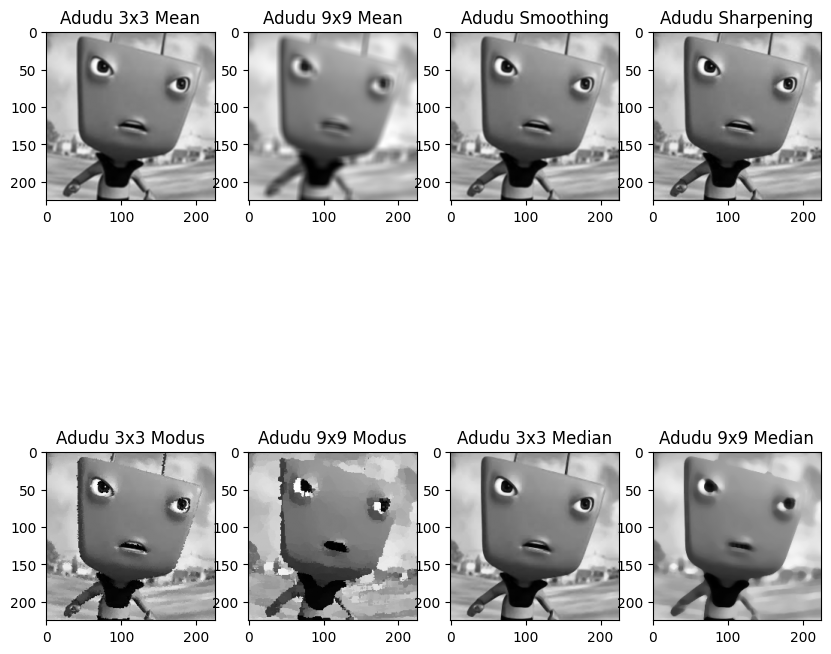

In [90]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow (adudu3x3, cmap='gray')
plt.title('Adudu 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow (adudu9x9, cmap='gray')
plt.title('Adudu 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow (aduduSmoothing, cmap='gray')
plt.title('Adudu Smoothing')

plt.subplot(2, 4, 4)
plt.imshow (aduduSharpening, cmap='gray')
plt.title('Adudu Sharpening')

plt.subplot(2, 4, 5)
plt.imshow (adudu3x3Modus, cmap='gray')
plt.title('Adudu 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow (adudu9x9Modus, cmap='gray')
plt.title('Adudu 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow (adudu3x3Median, cmap='gray')
plt.title('Adudu 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow (adudu9x9Median, cmap='gray')
plt.title('Adudu 9x9 Median')


In [91]:
def conv(kernel, img):
        result = np.zeros_like(img)
        pad_height, pad_width = img.shape
        kernel_height, kernel_width = kernel.shape
        for i in range(pad_height - kernel_height + 1):
            for j in range(pad_width - kernel_width + 1):
                result[i][j] = np.sum(img[i:i+kernel_height, j:j+kernel_width] * kernel)
        return result

<h1>Konvolusi Tanpa Padding</h1>
<p>Kode di atas mendefinisikan fungsi conv(kernel, img) yang melakukan operasi konvolusi 2D antara sebuah kernel dan citra tanpa menambahkan padding terlebih dahulu. Fungsi ini membuat array hasil berukuran sama dengan img, namun hanya akan terisi sebagian karena ukuran kernel mengurangi area yang dapat diproses sepenuhnya. Untuk setiap posisi (i, j) dalam citra yang memungkinkan, fungsi mengambil jendela seukuran kernel dari citra, mengalikan elemen-elemen yang bersesuaian antara jendela dan kernel, menjumlahkan hasilnya, dan menyimpan nilai tersebut ke posisi (i, j) di array hasil. Karena tidak ada padding, ukuran area hasil efektif akan lebih kecil dari ukuran citra asli, dan bagian tepi citra tidak akan diproses sepenuhnya.</p>

In [92]:
def sobel(image):
    sobelx = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    sobely = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])
    
    conv1 = conv(sobelx, image)
    conv2 = conv(sobely, image)
    result = np.sqrt(conv1 ** 2 + conv2 ** 2)
    return result

<h1>Operator Sobel</h1>
<p>Fungsi sobel(image) digunakan untuk melakukan deteksi tepi pada sebuah citra grayscale menggunakan operator Sobel. Fungsi ini memanfaatkan dua kernel Sobel, yaitu sobelx untuk mendeteksi perubahan intensitas secara horizontal dan sobely untuk perubahan secara vertikal. Kedua kernel ini masing-masing diterapkan ke citra menggunakan fungsi conv, menghasilkan dua citra gradien (conv1 dan conv2). Nilai akhir untuk setiap piksel dihitung sebagai magnitudo gradien, yaitu akar kuadrat dari jumlah kuadrat kedua hasil konvolusi tersebut, yang merepresentasikan seberapa tajam perubahan intensitas pada titik tersebut. Hasil akhirnya adalah citra yang menyoroti tepi atau batas objek di dalam gambar.</p>

In [93]:
def prewit(image):
    prewittx = np.array([[-1,  0,  1],
                         [-1,  0,  1],
                         [-1,  0,  1]])

    prewitty = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]])

    convx = conv(prewittx, image)
    convy = conv(prewitty, image)
    result = np.sqrt(convx ** 2 + convy ** 2)
    return result


<h1>Operator Prewitt</h1>
<p>Fungsi prewit(image) digunakan untuk mendeteksi tepi pada citra grayscale dengan menggunakan operator Prewitt. Operator ini mirip dengan Sobel, namun dengan bobot yang lebih sederhana. Dua kernel didefinisikan yaitu prewittx untuk mendeteksi tepi vertikal dan prewitty untuk mendeteksi tepi horizontal. Masing-masing kernel diterapkan ke citra menggunakan fungsi conv, menghasilkan dua peta gradien. Nilai akhir untuk setiap piksel dihitung sebagai magnitudo gradien, yaitu akar kuadrat dari jumlah kuadrat gradien vertikal dan horizontal. Hasil akhirnya adalah citra yang menampilkan garis-garis tepi, yaitu area dengan perubahan intensitas yang signifikan.</p>

In [94]:
def roberts(image):
    roberts1 = np.array([[1,  0],
                         [0, -1]])

    roberts2 = np.array([[0, 1],
                         [-1, 0]])

    conv1 = conv(roberts1, image)
    conv2 = conv(roberts2, image)
    result = np.sqrt(conv1 ** 2 + conv2 ** 2)
    return result


<h1>Operator Robert</h1>
<p>Fungsi roberts(image) digunakan untuk mendeteksi tepi pada citra grayscale menggunakan operator Roberts, yang merupakan metode deteksi tepi sederhana berbasis perbedaan diagonal. Fungsi ini menggunakan dua kernel kecil berukuran 2×2, roberts1 digunakan untuk mendeteksi perubahan intensitas sepanjang diagonal utama, dan roberts2 untuk diagonal lainnya. Kedua kernel tersebut dikonvolusikan dengan citra menggunakan fungsi conv, lalu magnitudo gradien dihitung dari kedua hasil konvolusi tersebut untuk menghasilkan citra akhir yang menonjolkan area dengan perubahan intensitas tajam (tanda keberadaan tepi).</p>

<h1>Menampilkan Hasil operasi Sobel</h1>
<p>Kode berikut digunakan untuk menampilkan hasil operasi citra menggunakan operator Sobel dengan memanggil fungsi yang di-definisikan sebelumnya.</p>

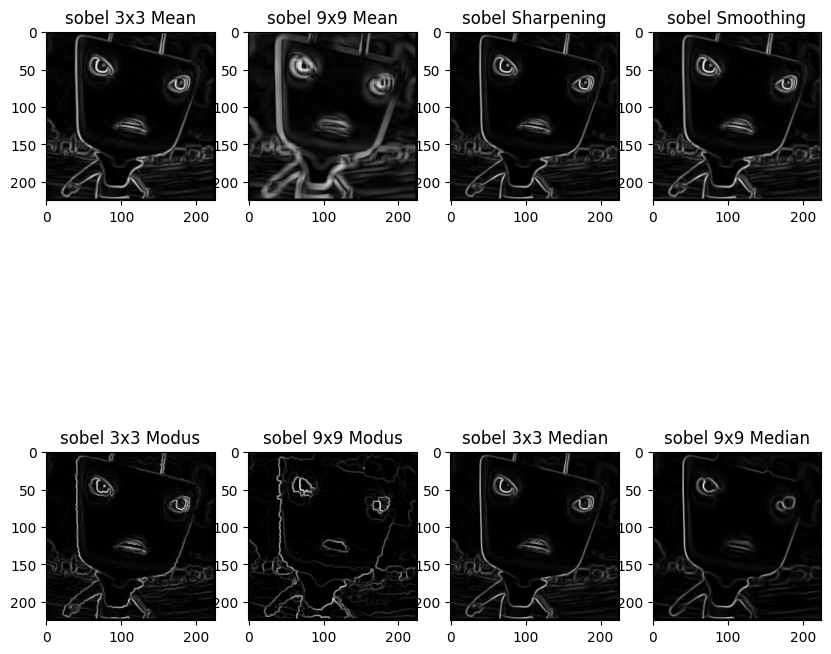

In [95]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(sobel(adudu3x3), cmap='gray')
plt.title('sobel 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow(sobel(adudu9x9), cmap='gray')
plt.title('sobel 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow(sobel(aduduSharpening), cmap='gray')
plt.title('sobel Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(sobel(aduduSmoothing), cmap='gray')
plt.title('sobel Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(sobel(adudu3x3Modus), cmap='gray')
plt.title('sobel 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow(sobel(adudu9x9Modus), cmap='gray')
plt.title('sobel 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow(sobel(adudu3x3Median), cmap='gray')
plt.title('sobel 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow(sobel(adudu9x9Median), cmap='gray')
plt.title('sobel 9x9 Median')
plt.show()

<h1>Menampilkan Hasil Operasi Prewitt</h1>
<p>Kode berikut digunakan untuk menampilkan hasil operasi citra menggunakan operator Prewitt dengan memanggil fungsi yang di-definisikan sebelumnya.</p>

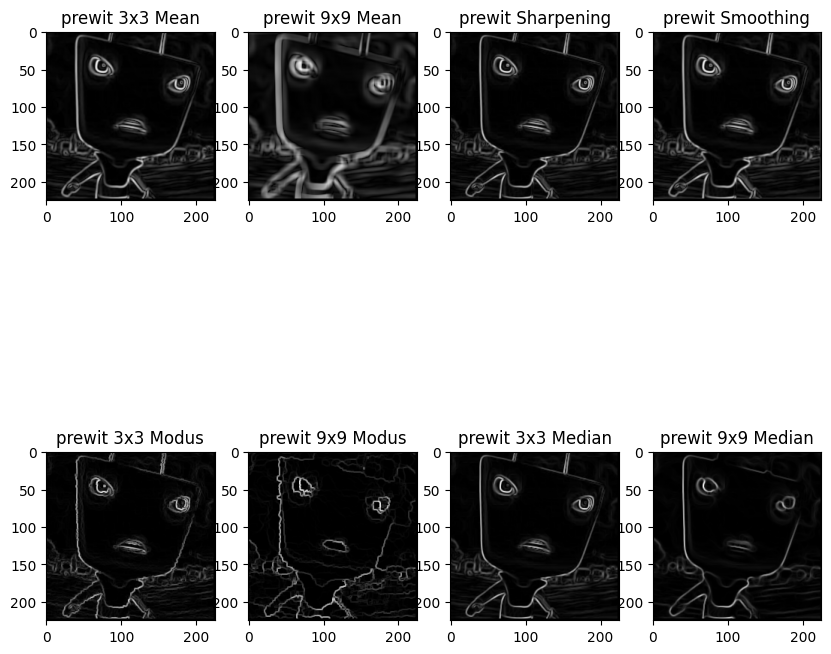

In [96]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(prewit(adudu3x3), cmap='gray')
plt.title('prewit 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow(prewit(adudu9x9), cmap='gray')
plt.title('prewit 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow(prewit(aduduSharpening), cmap='gray')
plt.title('prewit Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(prewit(aduduSmoothing), cmap='gray')
plt.title('prewit Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(prewit(adudu3x3Modus), cmap='gray')
plt.title('prewit 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow(prewit(adudu9x9Modus), cmap='gray')
plt.title('prewit 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow(prewit(adudu3x3Median), cmap='gray')
plt.title('prewit 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow(prewit(adudu9x9Median), cmap='gray')
plt.title('prewit 9x9 Median')
plt.show()

<h1>Menampilkan Hasil Operasi Robert</h1>
<p>Kode berikut digunakan untuk menampilkan hasil operasi citra menggunakan operator Robert dengan memanggil fungsi yang di-definisikan sebelumnya.</p>

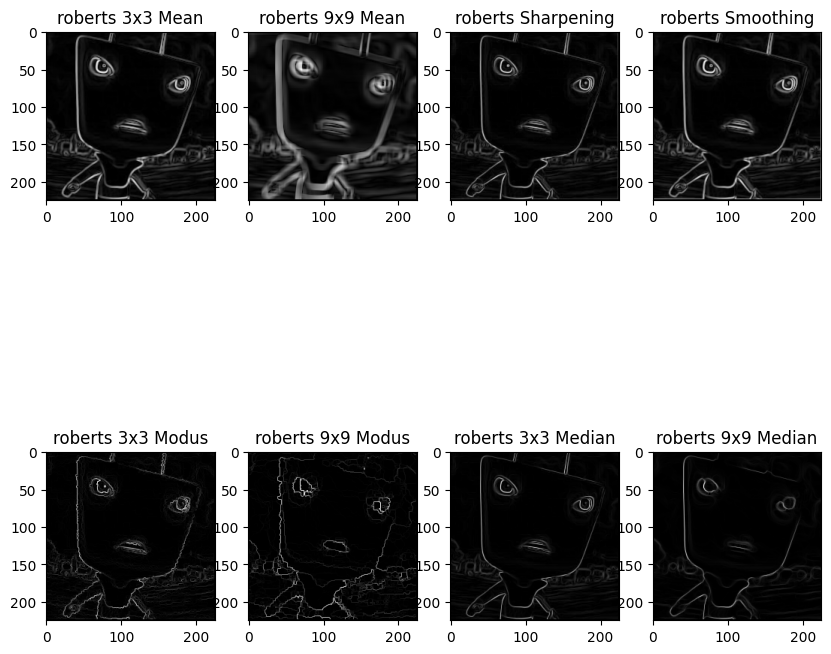

In [97]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(roberts(adudu3x3), cmap='gray')
plt.title('roberts 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow(roberts(adudu9x9), cmap='gray')
plt.title('roberts 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow(roberts(aduduSharpening), cmap='gray')
plt.title('roberts Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(roberts(aduduSmoothing), cmap='gray')
plt.title('roberts Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(roberts(adudu3x3Modus), cmap='gray')
plt.title('roberts 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow(roberts(adudu9x9Modus), cmap='gray')
plt.title('roberts 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow(roberts(adudu3x3Median), cmap='gray')
plt.title('roberts 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow(roberts(adudu9x9Median), cmap='gray')
plt.title('roberts 9x9 Median')
plt.show()

<h1>Ultra Instinct</h1>
<p>Kode berikut digunakan untuk menampilkan boboiboy ultra insting yanng diperoleh denga memproses citra gray dengan kernel mean 9x9. Setelah itu, hasil proses tadi diproses lagi menggunakan kernel prewitt.</p>

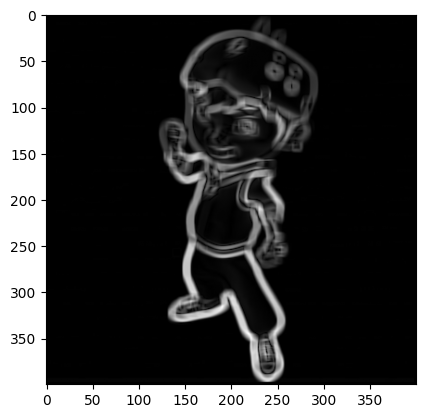

In [98]:
boboiboyMean = Mean(boboiboyGray, 9, 9)
boboiboyPrewitt = prewit(boboiboyMean)

plt.imshow(boboiboyPrewitt, cmap='gray')

In [99]:
def whitening(gambar, batas):
    m, n = gambar.shape
    out = np.zeros_like(gambar, dtype=float)
    
    for i in range(m):
        for j in range(n):
            if gambar[i, j] > batas:
                out[i, j] = 1.0
            else:
                out[i, j] = 0.0
    
    return out

<h1>Thresholding</h1>
<p>Fungsi whitening(gambar, batas) digunakan untuk melakukan proses thresholding biner pada sebuah citra grayscale. Fungsi ini memeriksa setiap piksel dalam citra gambar, lalu membandingkan nilainya dengan parameter ambang batas. Jika nilai piksel lebih besar dari batas, maka piksel tersebut diubah menjadi 1, jika tidak, diubah menjadi 0. Hasil akhirnya adalah citra biner dalam bentuk array float, di mana objek-objek yang lebih terang dari ambang akan tampak putih, dan sisanya menjadi hitam.</p>

<h1>Menampilkan Hasil Thresholding</h1>
<p>Kode berikut digunakan untuk menampilkan hasil thresholding menggunakan fungsi plt.imshow().</p>

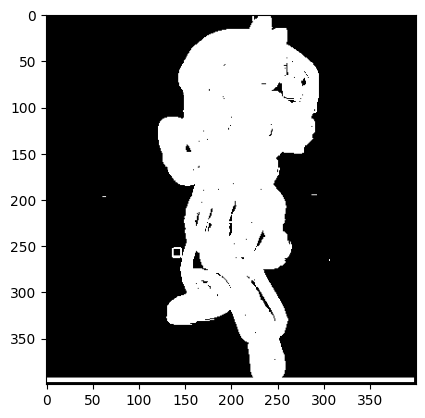

In [100]:
boboiboywhitening = whitening(boboiboyPrewitt, 1)
plt.imshow(boboiboywhitening, cmap='gray')

In [101]:
def operasi_erosi(biner, ukuran=3):
    pad = ukuran // 2
    m, n = biner.shape
    hasil = np.zeros_like(biner)
    pad_img = np.pad(biner, pad, mode='constant', constant_values=0)

    for i in range(m):
        for j in range(n):
            window = pad_img[i:i+ukuran, j:j+ukuran]
            if np.all(window == 1):
                hasil[i, j] = 1
    return hasil

def operasi_dilasi(biner, ukuran=3):
    pad = ukuran // 2
    m, n = biner.shape
    hasil = np.zeros_like(biner)
    pad_img = np.pad(biner, pad, mode='constant', constant_values=0)

    for i in range(m):
        for j in range(n):
            window = pad_img[i:i+ukuran, j:j+ukuran]
            if np.any(window == 1):
                hasil[i, j] = 1
    return hasil

def opening(biner, ukuran=3):
    erosi = operasi_erosi(biner, ukuran)
    hasil = operasi_dilasi(erosi, ukuran)
    return hasil

<h1></h1>
<p>Kode di atas terdiri dari tiga fungsi yaitu erosi, dilasi, dan opening. Fungsi operasi_erosi(biner, ukuran=3) melakukan erosi dengan menggeser window berukuran tertentu (default 3×3) ke seluruh citra biner yang telah dipad dengan nol. Jika semua piksel dalam window bernilai 1, maka piksel pusat pada citra hasil diset ke 1. Jika tidak, maka akan diset ke 0. Erosi berfungsi untuk mengurangi objek, menghilangkan noise kecil, atau memisahkan objek yang berdekatan. Sebaliknya, fungsi operasi_dilasi(biner, ukuran=3) melakukan dilasi, yaitu jika ada setidaknya satu piksel bernilai 1 dalam window, maka piksel pusat diset ke 1, sehingga objek tampak membesar atau lubang kecil dalam objek tertutup. Fungsi opening(biner, ukuran=3) adalah kombinasi dari kedua operasi, yaitu erosi terlebih dahulu, diikuti oleh dilasi, dan biasanya digunakan untuk menghilangkan noise kecil pada citra biner sambil tetap menjaga bentuk asli objek yang lebih besar.</p>

<h1>Enhance Ultra Instinct</h1>
<p>Kode berikut merupakan kode yang digunakan untuk menampilkan Boboiboy mode ultra intinct yang sudah diperkuat menggunakan serangkaian proses di atas kemudian hasilnya diproses lagi menggunakan kernel median.</p>

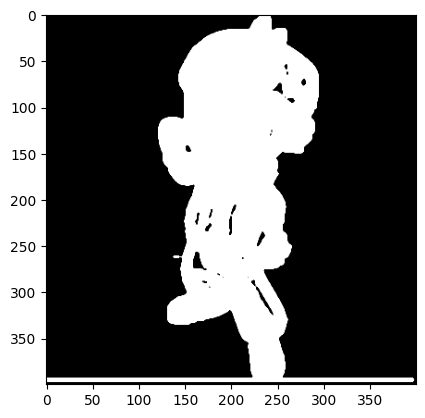

In [102]:
ultra_intinct = opening(boboiboywhitening, 3)
median_ultra = Median(ultra_intinct, 3, 3)
plt.imshow(median_ultra, cmap='gray')

<h1>Memecah Citra RGB</h1>
<p>Kode berikut digunakan untuk memecah citra menjadi 3 chanel warna kemudian mlakukan alpha masking untuk setiap chanel warna.</p>

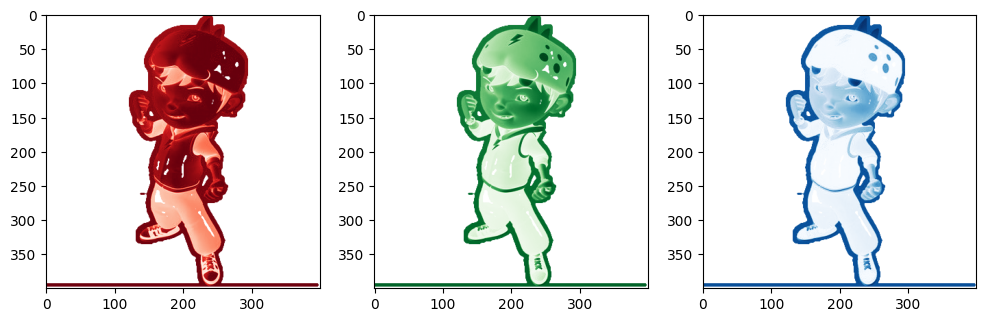

In [ ]:
R = boboiboyBase[:, :, 0]/255
G = boboiboyBase[:, :, 1]/255
B = boboiboyBase[:, :, 2]/255

mask = median_ultra.astype(float)
if mask.max() > 1.0:
    mask /= 255.0

plt.figure(figsize=(12, 6))

# Plot Red channel
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds', alpha=mask)

# Plot Green channel
plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens', alpha=mask)

# Plot Blue channel
plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues', alpha=mask)

plt.show()

<h1>Boboiboy Master Ultra Instinct</h1>
<p>Kode berikut digunakan untuk melakukan penjumlahan terhadap ketiga chanel warna sebelumnya untuk menghasilkan 1 citra utuh.</p>

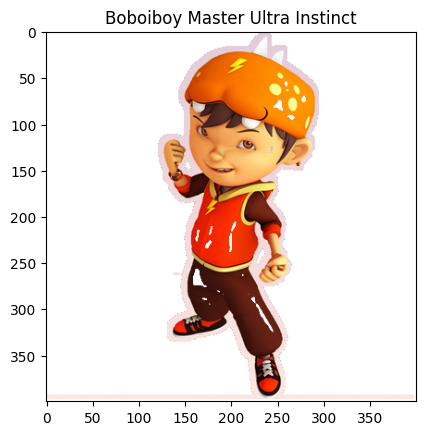

In [104]:
mask = median_ultra.astype(float)
if mask.max() > 1.0:
    mask /= 255.0

H, W = R.shape
background_white = np.ones((H, W, 3))

Api = np.stack((R, np.zeros_like(R), np.zeros_like(R)), axis=2)
Angin = np.stack((np.zeros_like(G), G, np.zeros_like(G)), axis=2)
Air = np.stack((np.zeros_like(B), np.zeros_like(B), B), axis=2)

fusionRGB = Api * mask[..., None] + Angin * mask[..., None] + Air * mask[..., None]
boboiboyMUI = background_white * (1 - mask[..., None]) + fusionRGB * mask[..., None]

plt.imshow(boboiboyMUI)
plt.title("Boboiboy Master Ultra Instinct")
plt.show()